In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [3]:
from keras.datasets import imdb

In [4]:
#numwords mean we will only keep the top 10000 more frequently occuring words in the training
#rare words will be discarded
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 9s 0us/step


In [5]:
train_data[0], train_labels[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [12]:
# turning the list of integers into tensors
# Pad your lists so that they all have the same length, turn them into an integer
# tensor of shape (samples, word_indices), and then use as the first layer in
# your network a layer capable of handling such integer tensors

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train.shape, y_test.shape

((25000,), (25000,))

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [52]:
#setting aside the validation set
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]
y_val = y_train[: 10000]
partial_y_train = y_train[10000:]

In [54]:
# we will now tain the model in 20 epoches in minibatches of 512 samples
# 20 iterations over all samples in the x_train and y_train tensors

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 138ms/step - loss: 0.5929 - acc: 0.7380 - val_loss: 0.4578 - val_acc: 0.8304
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3537 - acc: 0.8821 - val_loss: 0.3137 - val_acc: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2331 - acc: 0.9174 - val_loss: 0.2837 - val_acc: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1787 - acc: 0.9385 - val_loss: 0.3110 - val_acc: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1412 - acc: 0.9521 - val_loss: 0.2995 - val_acc: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1180 - acc: 0.9608 - val_loss: 0.3327 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0942 - acc: 0.9703 - val_loss: 0.3536 - val_acc: 0.8820
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0792 - 

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                160016    
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161121 (629.38 KB)
Trainable params: 161

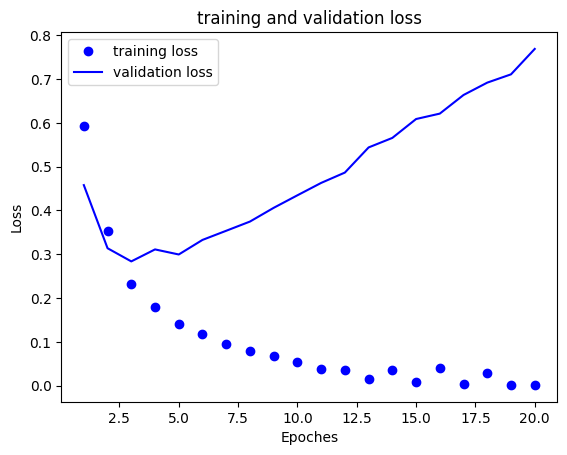

In [58]:
#plotting the training and validation loss
import matplotlib.pyplot as  plt

history_dict = history.history
loss_values = history_dict ['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = "training loss")
plt.plot(epochs, val_loss_values, 'b', label = "validation loss")
plt.title("training and validation loss")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
history_dict

{'loss': [0.5928864479064941,
  0.3536930978298187,
  0.23308822512626648,
  0.1787172108888626,
  0.14118275046348572,
  0.11797455698251724,
  0.0942172035574913,
  0.07915888726711273,
  0.06672586500644684,
  0.053593896329402924,
  0.03895506635308266,
  0.036599546670913696,
  0.014930402860045433,
  0.03529800847172737,
  0.008277718909084797,
  0.040763869881629944,
  0.004635539837181568,
  0.029397308826446533,
  0.0025704826693981886,
  0.0017373943701386452],
 'acc': [0.7379999756813049,
  0.8821333050727844,
  0.9174000024795532,
  0.9385333061218262,
  0.9521333575248718,
  0.9607999920845032,
  0.9703333377838135,
  0.9753999710083008,
  0.9808666706085205,
  0.9850000143051147,
  0.9887333512306213,
  0.9887333512306213,
  0.9980666637420654,
  0.9890000224113464,
  0.9986666440963745,
  0.9896666407585144,
  0.9992666840553284,
  0.9917333126068115,
  0.9995333552360535,
  0.9997333288192749],
 'val_loss': [0.45778560638427734,
  0.3136979043483734,
  0.283674538135528

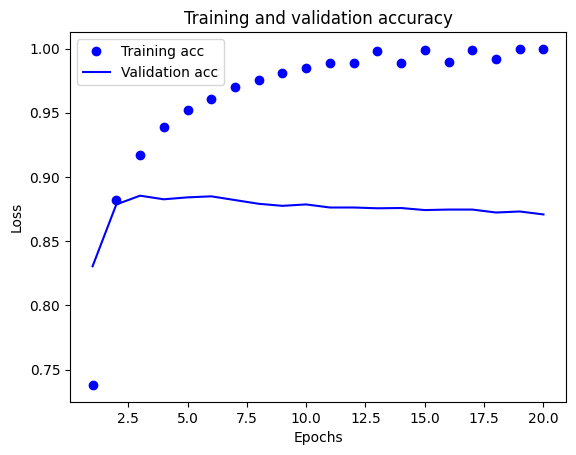

In [60]:
#plotting the training and validation accuracy
acc_values = history_dict['acc']
values_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, values_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.8469 - acc: 0.8564


[0.8468536734580994, 0.856440007686615]

In [35]:
#retrain only 4 epochs from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.4700 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2806 - accuracy: 0.8982
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2212 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2807 - accuracy: 0.8882


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
results

[0.2806924283504486, 0.8882399797439575]

In [40]:
y_pred = model.predict(x_test)
y_pred

782/782 [==============================] - 2s 3ms/step


array([[0.23311594],
       [0.99959177],
       [0.7738537 ],
       ...,
       [0.10840328],
       [0.1158816 ],
       [0.49016973]], dtype=float32)

In [38]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [43]:
y_pred.shape, y_test.shape

((25000, 1), (25000,))